In [1]:
import numpy as np
import math
import scipy.io
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [26]:
def cut(a1,a2,a3,a4,b1,b2,b3,b4,xp,yp,data):
    xL=math.floor((b2-b1)/(a2-a1)*xp)
    yL=math.floor((b4-b3)/(a4-a3)*yp)
    xs=math.floor((b1-a1)/(a2-a1)*xp)
    ys=math.floor((b3-a3)/(a4-a3)*yp)
    return data[ys:ys+yL,xs:xs+xL]
# integrate GIWAXS to get I vs qz. a1-a4 are original image size (qyxmin,qxymax,qzmin,qzmax); b1-b4 are the area to be integrated.
# xp,yp are how many points in xy and z direction. Data is GIWAXS data.
def qzint(a1,a2,a3,a4,b1,b2,b3,b4,xp,yp,data):
    xL=math.floor((b2-b1)/(a2-a1)*xp)
    yL=math.floor((b4-b3)/(a4-a3)*yp)
    xs=math.floor((b1-a1)/(a2-a1)*xp)
    ys=math.floor((b3-a3)/(a4-a3)*xp)
    data1=data[ys:ys+yL,xs:xs+xL]
    data2=sum(np.transpose(data1))
    data3=np.zeros([yp,xp])
    data3[ys:ys+yL,xs:xs+xL]=data[ys:ys+yL,xs:xs+xL]
    return data2,data3
# integrate GIWAXS to get I vs qxy.
def qxyint(a1,a2,a3,a4,b1,b2,b3,b4,xp,yp,data):
    xL=math.floor((b2-b1)/(a2-a1)*xp)
    yL=math.floor((b4-b3)/(a4-a3)*yp)
    xs=math.floor((b1-a1)/(a2-a1)*xp)
    ys=math.floor((b3-a3)/(a4-a3)*xp)
    data1=data[ys:ys+yL,xs:xs+xL]
    data2=sum(data1)
    data3=np.zeros([yp,xp])
    data3[ys:ys+yL,xs:xs+xL]=data[ys:ys+yL,xs:xs+xL]
    return data2,data3
# integrate GIWAXS to get I vs q.
def angularint(a1,a2,a3,a4,qp,angle1,angle2,qqmin,xp,yp,data):
    data1=np.zeros([yp,xp])
    xline=np.linspace(1,xp-1,xp-1)
    xline=xline.astype(int)
    yline=np.linspace(1,yp-1,yp-1)
    yline=yline.astype(int)
    I=np.zeros(qp)
    for i in xline:
        for j in yline:
            a=(a2-a1)/xp*i+a1
            b=(a4-a3)/yp*j+a3
            q=np.sqrt(a*a+b*b)
            qi=math.floor(q/(a4/qp))
            angle=np.arccos(a/q)
            if angle>angle1:
                if angle<angle2:
                    if q<a4:
                        if q>qqmin:
                            I[qi]=I[qi]+data[j,i]
                            data1[j,i]=data1[j,i]+data[j,i]
    return I,data1

In [15]:
# load GIWAXS data and input qxy qz range
dirr = 'D:\\research\strain\CU_GIWAXS'
filename = '\mars_zihan_ito_C5_30min_08252021rcp'
f = scipy.io.loadmat(dirr+filename+'.mat')
Giwaxs_data=f['a']
Giwaxs_data=np.array(Giwaxs_data)
# Giwaxs_data=np.flip(Giwaxs_data)
qxymax=14
qzmax=7.8
qzmin=-2.515
yp,xp=Giwaxs_data.shape

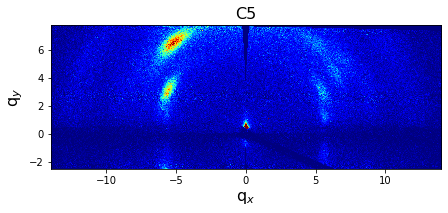

In [16]:
# plot orignal GIWAXS pattern
fig,ax=plt.subplots(figsize=(7,7))

ax.imshow(Giwaxs_data, interpolation='nearest', cmap=cm.jet,
               origin='lower', extent=[-qxymax, qxymax, qzmin, qzmax],
               vmax=0.00000001*Giwaxs_data.max(), vmin=Giwaxs_data.min())
ax.set_xlabel('q$_{x}$',fontsize=16)
ax.set_ylabel('q$_{y}$',fontsize=16)
ax.set_title('C5',fontsize=16)
plt.savefig('C:\\Users\z4794\Desktop\C5.pdf')

Text(0.5, 1.0, 'GIWAXS')

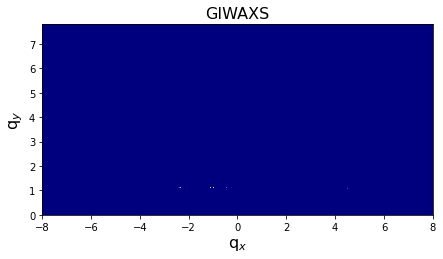

In [18]:
# cut the GIWAXS data
qxymin1=-8
qxymax1=8
qzmin1=0
qzmax1=7.8

Giwaxs_data1=cut(-qxymax,qxymax,qzmin,qzmax,qxymin1,qxymax1,qzmin1,qzmax1,xp,yp,Giwaxs_data)
fig,ax=plt.subplots(figsize=(7,7))

ax.imshow(Giwaxs_data1, interpolation='nearest', cmap=cm.jet,
               origin='lower', extent=[qxymin1,qxymax1,qzmin1,qzmax1],
               vmax=Giwaxs_data.max(), vmin=Giwaxs_data.min())
ax.set_xlabel('q$_{x}$',fontsize=16)
ax.set_ylabel('q$_{y}$',fontsize=16)
ax.set_title('GIWAXS',fontsize=16)

In [44]:
# integrate GIWAXS data to show I vs qz
qxymin2=0.13
qxymax2=0.2
qzmin2=0
qzmax2=0.5

yp,xp=Giwaxs_data1.shape
data2,Giwaxs_data2=qzint(qxymin1,qxymax1,qzmin1,qzmax1,qxymin2,qxymax2,qzmin2,qzmax2,xp,yp,Giwaxs_data1)

Text(0.5, 1.0, 'Original GIWAXS')

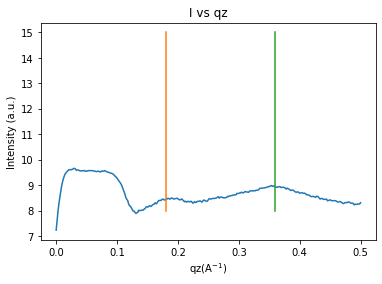

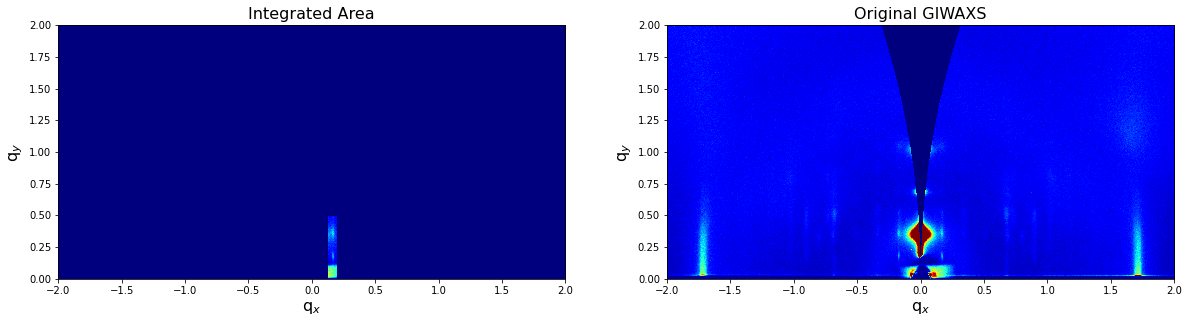

In [46]:
# plot intensity vs qz
yp1=len(data2)
plt.plot(np.linspace(0,qzmax2,yp1),np.log(data2))
plt.plot(0.18*np.ones(yp1),np.linspace(8,15,yp1))
plt.plot(2*0.18*np.ones(yp1),np.linspace(8,15,yp1))
plt.xlabel('qz(A$^{-1}$)')
plt.ylabel('Intensity (a.u.)')
plt.title("I vs qz")

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,20))

ax1.imshow(Giwaxs_data2, interpolation='nearest', cmap=cm.jet,
               origin='lower', extent=[qxymin1,qxymax1,qzmin1,qzmax1],
               vmax=Giwaxs_data.max()*0.01, vmin=Giwaxs_data.min())
ax1.set_xlabel('q$_{x}$',fontsize=16)
ax1.set_ylabel('q$_{y}$',fontsize=16)
ax1.set_title('Integrated Area',fontsize=16)

ax2.imshow(Giwaxs_data1, interpolation='nearest', cmap=cm.jet,
               origin='lower', extent=[qxymin1,qxymax1,qzmin1,qzmax1],
               vmax=Giwaxs_data.max()*0.01, vmin=Giwaxs_data.min())
ax2.set_xlabel('q$_{x}$',fontsize=16)
ax2.set_ylabel('q$_{y}$',fontsize=16)
ax2.set_title('Original GIWAXS',fontsize=16)

In [64]:
# integrate GIWAXS data to show I vs qxy
qxymin2=0.13
qxymax2=0.2
qzmin2=0.5
qzmax2=1.5

yp,xp=Giwaxs_data1.shape
data2,Giwaxs_data2=qxyint(qxymin1,qxymax1,qzmin1,qzmax1,qxymin2,qxymax2,qzmin2,qzmax2,xp,yp,Giwaxs_data1)
xp=data2.shape[0]
# print(xp)

Text(0.5, 1.0, 'Original GIWAXS')

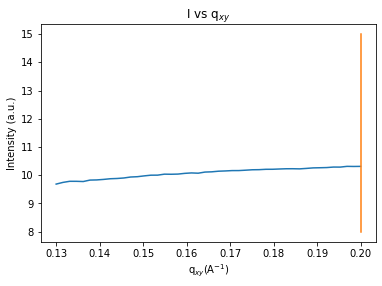

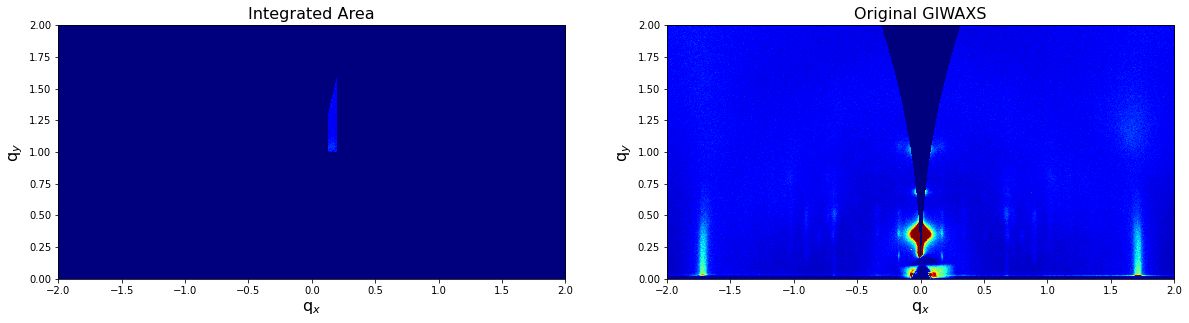

In [65]:
# plot intensity vs qxy
plt.plot(np.linspace(qxymin2,qxymax2,xp),np.log(data2))
plt.plot(0.2*np.ones(xp),np.linspace(8,15,xp))
# plt.plot(2*0.385*np.ones(xp),np.linspace(8,15,xp))
plt.xlabel('q$_{xy}$(A$^{-1}$)')
plt.ylabel('Intensity (a.u.)')
plt.title("I vs q$_{xy}$")

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,20))

ax1.imshow(Giwaxs_data2, interpolation='nearest', cmap=cm.jet,
               origin='lower', extent=[qxymin1,qxymax1,qzmin1,qzmax1],
               vmax=Giwaxs_data.max()*0.01, vmin=Giwaxs_data.min())
ax1.set_xlabel('q$_{x}$',fontsize=16)
ax1.set_ylabel('q$_{y}$',fontsize=16)
ax1.set_title('Integrated Area',fontsize=16)

ax2.imshow(Giwaxs_data1, interpolation='nearest', cmap=cm.jet,
               origin='lower', extent=[qxymin1,qxymax1,qzmin1,qzmax1],
               vmax=Giwaxs_data.max()*0.01, vmin=Giwaxs_data.min())
ax2.set_xlabel('q$_{x}$',fontsize=16)
ax2.set_ylabel('q$_{y}$',fontsize=16)
ax2.set_title('Original GIWAXS',fontsize=16)

In [31]:
# integrate GIWAXS data to show I vs q

angle1=50
angle2=70
qqmin=5
qp=100

angle1=np.pi/2+angle1/180*np.pi
angle2=np.pi/2+angle2/180*np.pi

yp,xp=Giwaxs_data1.shape
data2,Giwaxs_data2=angularint(qxymin1,qxymax1,qzmin1,qzmax1,qp,angle1,angle2,qqmin,xp,yp,Giwaxs_data1)

<ipython-input-35-92e9b917bd43>:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.linspace(0,qzmax1,qp),np.log(data2))


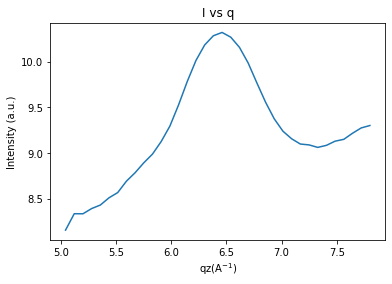

In [ ]:
# plot I vs q
plt.plot(np.linspace(0,qzmax1,qp),np.log(data2))
# plt.plot(0.68*np.ones(yp),np.linspace(8,15,yp))
# plt.plot(1.03*np.ones(yp),np.linspace(8,15,yp))
plt.xlabel('qz(A$^{-1}$)')
plt.ylabel('Intensity (a.u.)')
plt.title("I vs q")
plt.savefig('C:\\Users\z4794\Desktop\C5_0.pdf')

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,20))

ax1.imshow(Giwaxs_data2, interpolation='nearest', cmap=cm.jet,
               origin='lower', extent=[qxymin1,qxymax1,qzmin1,qzmax1],
               vmax=Giwaxs_data.max()*0.00000001, vmin=Giwaxs_data.min())
ax1.set_xlabel('q$_{x}$',fontsize=16)
ax1.set_ylabel('q$_{y}$',fontsize=16)
ax1.set_title('Integrated Area',fontsize=16)

ax2.imshow(Giwaxs_data1, interpolation='nearest', cmap=cm.jet,
               origin='lower', extent=[qxymin1,qxymax1,qzmin1,qzmax1],
               vmax=Giwaxs_data.max()*0.00000001, vmin=Giwaxs_data.min())
ax2.set_xlabel('q$_{x}$',fontsize=16)
ax2.set_ylabel('q$_{y}$',fontsize=16)
ax2.set_title('Original GIWAXS',fontsize=16)
plt.savefig('C:\\Users\z4794\Desktop\C5_1.pdf')

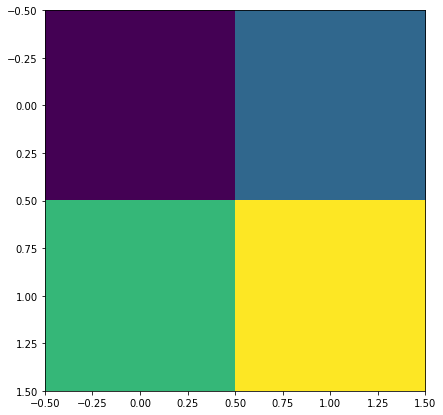

In [3]:
ii1=np.array([[1,2],[3,4]])
fig,ax=plt.subplots(figsize=(7,7))
ax.imshow(ii1)